<a href="https://colab.research.google.com/github/Gi-data/Proyecto_DS_Coderhouse/blob/main/Proyecto_Final_DS_Mignone_Ortiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1- Abstracto con motivación y audiencia

#### **Abstracto**
##### Este conjunto de datos proporciona una visión completa de los partidos de fútbol internacionales de selecciones nacionales entre 1993 y 2022. Ello lo convierte en una fuente valiosa de información para los investigadores y analistas de datos.

##### Entre las variables incluidas en el conjunto de datos se encuentran la nacionalidad y continente de los equipos, posiciones en el ranking, y ubicaciones donde se disputaron los partidos. Estos datos pueden ser analizados para identificar patrones y tendencias interesantes, como el desempeño de equipos específicos en diferentes continentes o la relación entre la ubicación de los partidos y el rendimiento del equipo. Además, el conjunto de datos incluye la fortaleza de cada equipo basada en las clasificaciones reales de la FIFA, lo que proporciona una forma objetiva de comparar equipos.

#### **Audiencia**

##### El valor agregado de estos datos puede ser potenciado mediante el uso de técnicas avanzadas de análisis de datos, lo que permite a las organizaciones y empresas descubrir patrones y tendencias que pueden monetizarse.
##### Los potenciales usuarios de este conjunto de datos incluyen analistas de datos, investigadores, periodistas deportivos, empresas de apuestas y otros interesados en el fútbol y los datos relacionados.

### 2- Preguntas/Problema 

#### **Pregunta de investigación**
¿Es efectivo predecir quien será el próximo ganador de la Copa Mundial de este año 2022 en base a resultados de años anteriores?

#### **Hipótesis conceptual**
El análisis de los resultados de los partidos anteriores predice quien será el próximo ganador de la Copa Mundial de este año 2022.

#### **Contexto comercial**
La Copa Mundial FIFA 2022 representa un evento de relevancia internacional. Frente a la posibilidad de realizar varios pitchings publicitarios para los últimos partidos de este evento se busca predecir quien será el ganador final de la Copa del Mundo.

#### **Problema**
El análisis de este dataset tiene como finalidad responder las siguientes preguntas específicas de fuerte interés para el cliente (por ejemplo, a un sponsor le resultaria de interes saber en que equipo invertir segun su exito o popularidad).

¿Qué equipo tiene los mejores jugadores ofensivos y defensivos?
¿Existe la ventaja del equipo local?
¿Existe una correlación entre la fuerza de un equipo y el resultado de su juego?
¿Se podrán crear nuevas funciones y construir un modelo de aprendizaje automático para predecir el ganador de este año?

### 3- Breve análisis exploratorio de datos (EDA)

#### **¿Cuáles son los 5 equipos más fuertes?**

La FIFA actualiza la clasificación de los equipos varias veces al año en función del rendimiento del equipo en los partidos. Cada equipo recibe una cierta cantidad de puntos en función de si ganó, perdió o empató, la importancia del partido y la fuerza del equipo contrario. El número total de puntos determina el rango FIFA del equipo.

Si queremos saber la clasificación más reciente del equipo, debemos centrarnos en el partido más reciente que jugó cada equipo.

(Se recuerda que el set de datos cuenta con observaciones hasta el dia 14/06/2022).

In [ ]:
#Importando Librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Leemos el archivo desde google sheets con pandas
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQlKd3e78RjHKWaPXR8ewnWJTNfcXIgalp2gxwvsoU1RfYzzEsqUa1Yst6U4WEGVrBETyN6w-RhtfJF/pub?gid=110461248&single=true&output=csv')

Con la funcion **head()** daremos una vista previa rapida de los primeros registros de nuestros datos asi como de todas las variables disponibles en el.  

In [ ]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Libreria Missingno
Realizamos una visualizacion de los datos faltantes con Missingno. 

<Axes: >

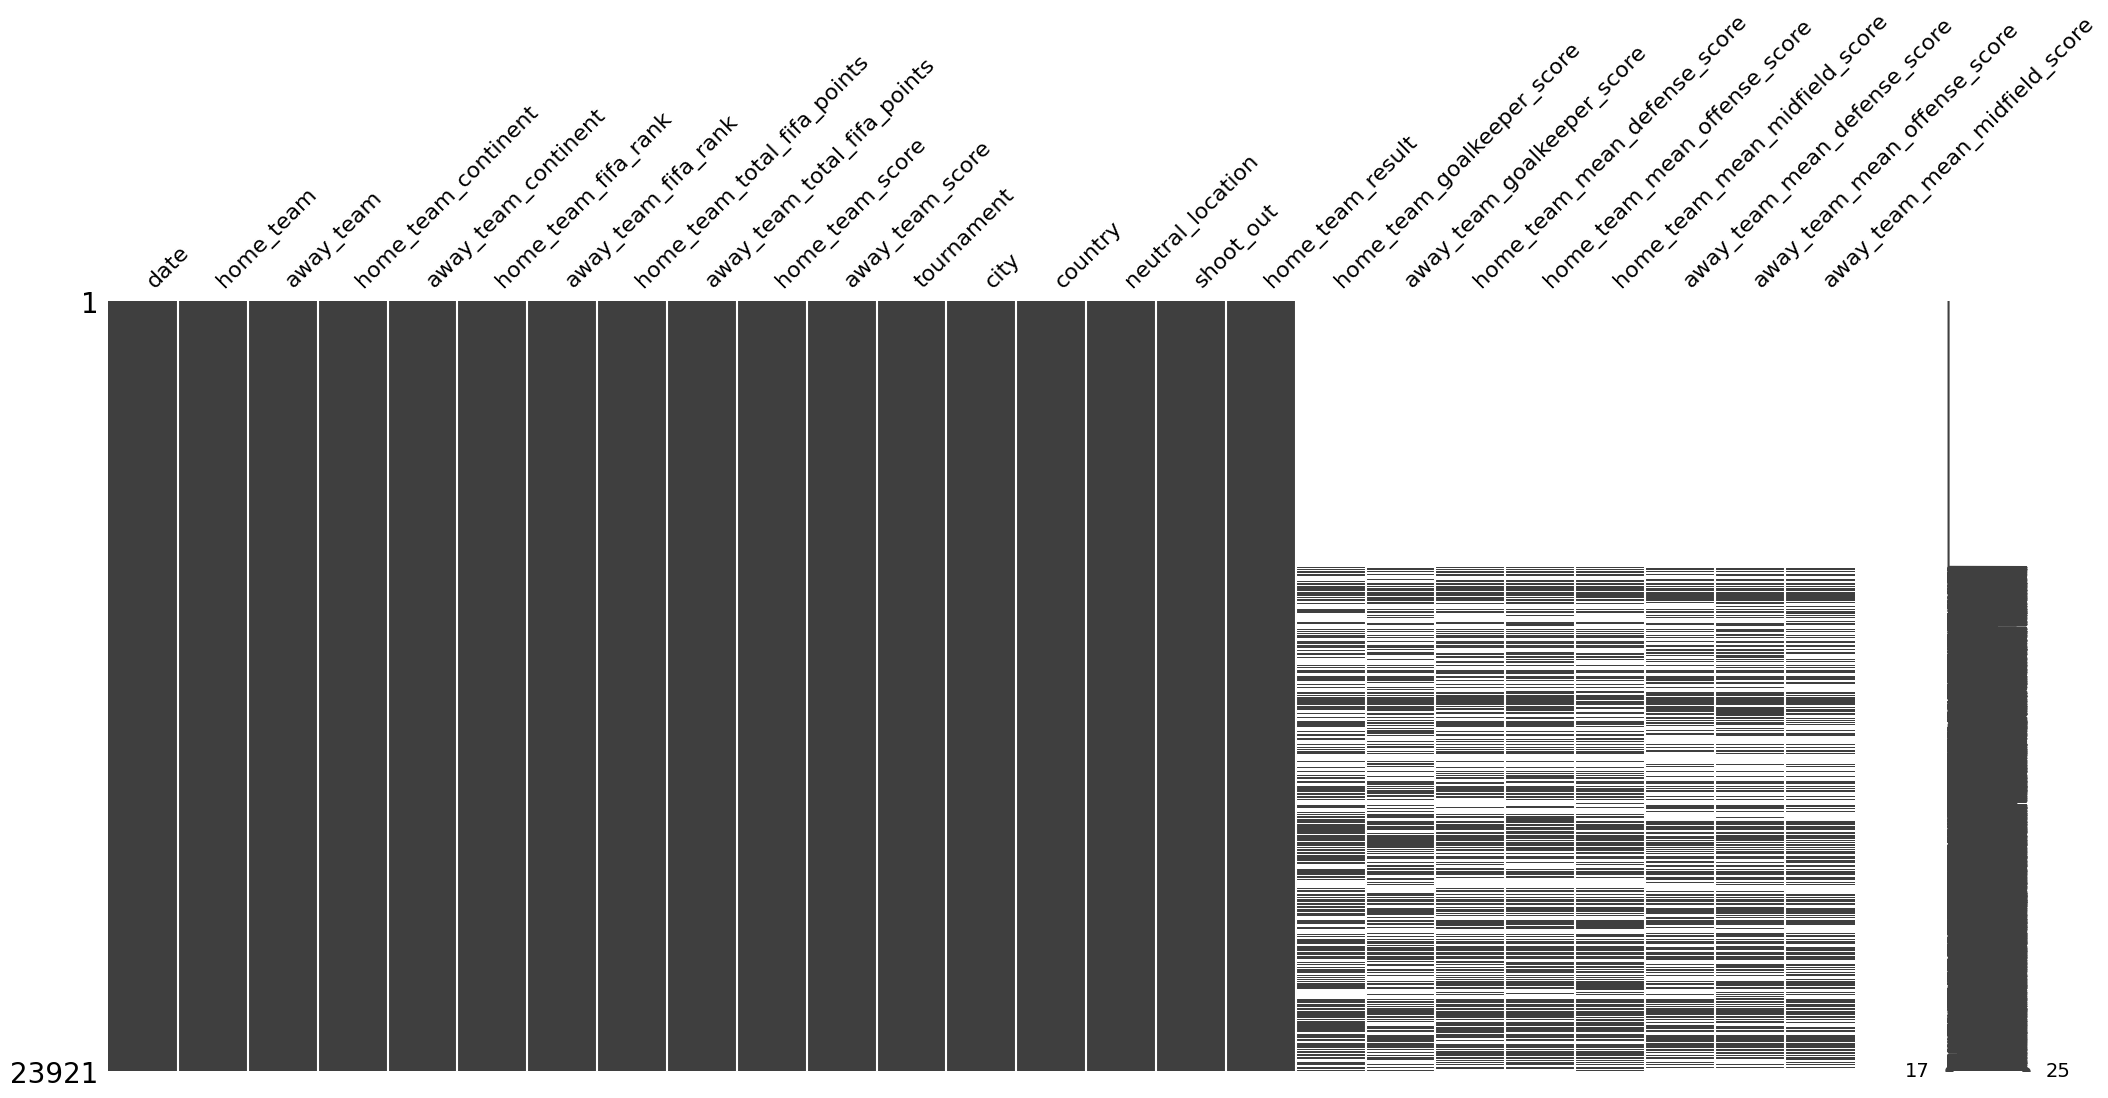

In [ ]:
import missingno as msno
msno.matrix(df)

Del grafico podemos observar que 17 de nuestras 25 variables no tienen valores faltantes en sus registros.

Segun el objetivo de nuestro estudio deberemos decidir que medida tomaremos con los datos faltantes. 
 
Por ejemplo, si tan solo nos interesara el porcentaje de victorias que tiene un equipo local vs un equipo visitante, solo nos interesarian las variables **'neutral_location'** para eliminar aquellas observaciones donde el partido se disputo en una locacion neutral y **'home_team_result'** para saber que resultado obtuvo el equipo local. Ambas variables no poseen valores faltantes, por lo cual podriamos trabajar tranquilamente. 

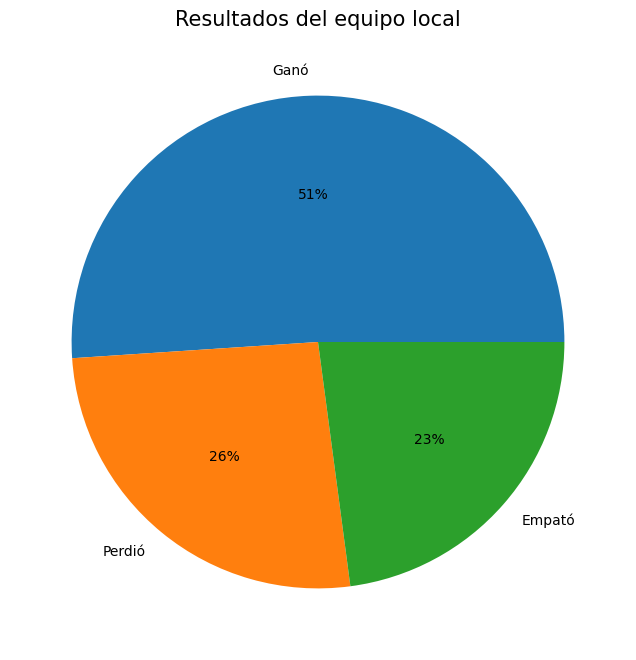

In [ ]:
#Se seleccionan los partidos que no se disputaron en estadios neutrales
home_team_advantage = df[df['neutral_location']==False]['home_team_result'].value_counts(normalize=True)

#grafica
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Ganó',  'Perdió', 'Empató'],  autopct='%.0f%%')
plt.title('Resultados del equipo local', fontsize = 15)
plt.show()

En el 51% de las veces, el equipo local consigue la victoria. Esto parecería indicar que la localía es muy importante. Sin embargo, esta información por sí sola no mide el poderío de los equipos en juego dado que podría pasar que los equipos ganan sus partidos de local simplemente por ser mejor equipo que el rival y no por la localía. Así que podemos concluir que es una variable muy importante pero no totalmente determinante.

# ¿Cuáles son los 5 equipos más fuertes?
La FIFA actualiza la clasificación de los equipos varias veces al año en función del rendimiento del equipo en los partidos. Cada equipo recibe una cierta cantidad de puntos en función de si ganó, perdió o empató, la importancia del partido y la fuerza del equipo contrario. El número total de puntos determina el rango FIFA del equipo.

Si queremos saber la clasificación más reciente del equipo, debemos centrarnos en el partido más reciente que jugó cada equipo...

(Se recuerda que el set de datos cuenta con observaciones hasta el dia 14/06/2022)

In [ ]:
#Reordenamos los datos
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank'})
away = fifa_rank[['date', 'away_team','away_team_fifa_rank']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank'})
fifa_rank = home.append(away)
#seleccionamos para cada país el último partido
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(5, 'rank')
#visualizamos los 5 equipos mas fuertes
fifa_rank_top

<ipython-input-8-0f4b0e245e1d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_rank = home.append(away)


,date,team,rank
23760,2022-06-06,Brazil,1
23909,2022-06-14,Belgium,2
23885,2022-06-13,France,3
23741,2022-06-05,Argentina,4
23906,2022-06-14,England,5


Brasil ocupa actualmente el rango más alto de la FIFA, seguido de Bélgica, Francia, Argentina e Inglaterra. 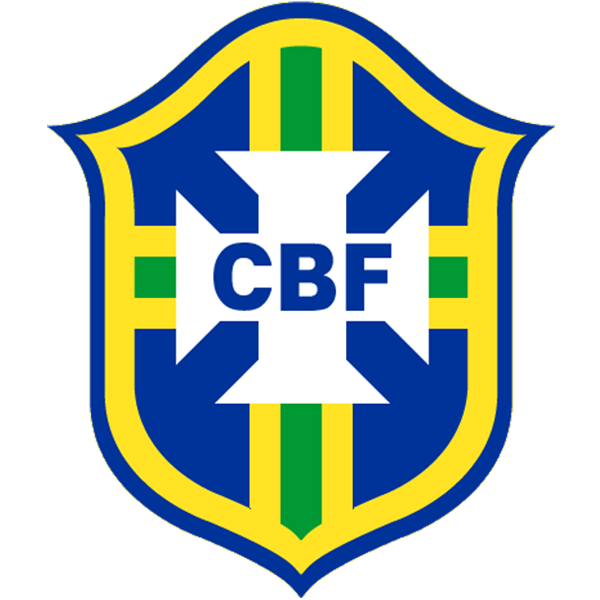

### 4- Ingeniería de variables

Supongamos que queremos predecir quien ganará un partido según el ranking FIFA que posee cada equipo. 
De todas nuestras variables, podriamos pensar que algunas de ellas no tendrian sentido que formen parte de nuestro analisis porque no aportarian ninguna relevacia al modelo. Algunas de estas variables podrian ser: 


*   'home_team_continent' (continente del equipo local)
*   'away_team_continent' (continente del equipo visitante)
*   'city' (ciudad en la que se disputó el partido) 
*   'country' (pais en el que se disputó el partido)

También crearemos nuevas variables que sean de interés y ayuda en nuestro análisis. 

* 'rank_difference': diferencia entre el ranking del equipo local y visitante
* 'average_rank': ranking promedio entre el ranking del equipo local y visitante
* 'point_difference': diferencia entre puntos totales fifa entre el equipo local y visitante
* 'score_difference': Diferencia de goles entre el equipo local y visitante
* is_won': booleano que será TRUE si el equipo local ganó. 
* 'is_stake': booleano que será TRUE cuando el partido en cuestión no sea amistoso. 
* 'is_worldcup': booleano que será TRUE si el partido fue disputado en el marco de la copa del mundo. 

In [ ]:
# generando variables
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank'] #diferencia entre el ranking del equipo local y visitante
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2 #ranking promedio entre local y visitante
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points'] #diferencia entre puntos totales fifa entre local y visitante
df['score_difference'] = df['home_team_score'] - df['away_team_score'] # Diferencia de goles entre local y visitante
df['is_won'] = df['score_difference'] > 0 # booleano que es true si el equipo local gano
df['is_stake'] = df['tournament'] != 'Friendly' #selecciono los partidos que no son amistosos
df['is_worldcup'] = 'FIFA World Cup' in df['tournament']

### 5- Entrenamiento y testeo

Con el fin de predecir si el equipo local gana o pierde el encuentro, se crearán modelos de machine learning que nos ayuden con esta prediccion.

En todos los casos, utilizaremos un 80% de nuestros datos como conjunto de entrenamiento y un 20% como conjunto de prueba. 

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake', 'is_worldcup']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Regresion logistica

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_pred = logreg.predict(X_test)

# K-Nearest-Neighbor
Entrenaremos el algoritmo Knn eligiendo k=3, o sea que consideramos 3 vecinos mas cercanos. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

# Arbol de decision
Entrenaremos el algoritmo de arboles de decision. 

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)

# Random Forest
Entrenaremos el algoritmo de Random Forest escogiendo 100 predicciones a promediar

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

# Evaluacion
Escogemos una entrada al azar y aplicamos todos los metodos entrenamos para ver su prediccion

In [ ]:
#Entrada al azar
rd=[17.5,	33,	0,	True,	False]
#Su verdadera respuesta es 'False'

In [ ]:
#Realizamos la prediccion correspondiente a cada modelo
y1=logreg.predict([rd])
y2=knn.predict([rd])
y3=decision_tree.predict([rd])
y4=random_forest.predict([rd])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Visualizamos los resultamos mediante un Data frame
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest' ],
    'Score': [y1,y2,y3,y4]})
models

,Model,Score
0,Logistic Regression,[False]
1,KNN,[False]
2,Decision Tree,[False]
3,Random Forest,[False]


Podemos concluir que para este ejemplo los 4 modelos generados acertaron con el valor real de la entrada, es decir que para estos datos el equipo visitante gano el partido.

# Evaluacion de nuestros modelos 

Realizaremos la evaluacion de la certeza de cada modelo generado con nuestros datos de entrenamiento

In [ ]:
# Regresion logistica
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

68.38

In [ ]:
# knn
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

62.82

In [ ]:
# arbol de decision
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

59.29

In [ ]:
# random forest
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

65.14

Ordenamos la certeza de nuestros modelos en una tabla comparativa


In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,68.38
2,Random Forest,65.14
0,KNN,62.82
3,Decision Tree,59.29


Podemos observar que el modelo con mayor presicion resulto ser el modelo de regresion logistica.

### 6- Optimización

Realizaremos la aplicacion de validacion cruzada (con 5-fold y 10-fold) para nuestros datos en diferentes modelos predictivos con el fin de mejorar la exactitud de los mismos. 




In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [ ]:
# Primero realizaremos una validacion cruzada K-fold con k=5
kf5 =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# Dividimos nuestros datos en conjuntos de entrenamiento y prueba
for train_index, test_index in kf5.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 19136, Test set:4785
Fold:2, Train set: 19137, Test set:4784
Fold:3, Train set: 19137, Test set:4784
Fold:4, Train set: 19137, Test set:4784
Fold:5, Train set: 19137, Test set:4784


In [ ]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [ ]:
#Validacion cruzada en el modelo de regresion lineal
score_lf5 = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf5, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score_lf5}')
rmse(score_lf5.mean())

Scores for each fold: [-0.20518831 -0.20536144 -0.20708151 -0.20529757 -0.2037053 ]
rmse= 0.45


In [ ]:
score_rf5 = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf5, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score_rf5}')
rf5 =rmse(score_rf5.mean())
rf5 

Scores for each fold are: [-0.23785667 -0.24416553 -0.2406695  -0.24437232 -0.23942991]
rmse= 0.49


In [ ]:
# Ahora realizaremos una validacion cruzada K-fold con k=10
kf10 =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# Dividimos nuestros datos en conjuntos de entrenamiento y prueba
for train_index, test_index in kf10.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 21528, Test set:2393
Fold:2, Train set: 21529, Test set:2392
Fold:3, Train set: 21529, Test set:2392
Fold:4, Train set: 21529, Test set:2392
Fold:5, Train set: 21529, Test set:2392
Fold:6, Train set: 21529, Test set:2392
Fold:7, Train set: 21529, Test set:2392
Fold:8, Train set: 21529, Test set:2392
Fold:9, Train set: 21529, Test set:2392
Fold:10, Train set: 21529, Test set:2392


In [ ]:
score_lf10 = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf10, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score_lf10}')
rmse(score_lf10.mean())


Scores for each fold: [-0.20017447 -0.21041517 -0.20778829 -0.20285847 -0.20664731 -0.2075312
 -0.20623236 -0.20447228 -0.20086083 -0.20656958]
rmse= 0.45


In [ ]:
score_rf10 = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf10, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score_rf10}')
rmse(score_rf10.mean())


Scores for each fold are: [-0.23262271 -0.24601451 -0.24835021 -0.23813508 -0.24445756 -0.24140255
 -0.24338767 -0.24066026 -0.23393647 -0.24703744]
rmse= 0.49


Podemos observar que generar una validacion de 10-fold no genera ninguna reduccion en el rmse. Tambien podemos decir que el modelo de regresion lineal tiene un rmse apenas menor que el modelo de random forest. 

### 7- Selección de modelos

Luego de lo expuesto en secciones anteriores, podemos estar en condiciones de afirmar que de todos los modelos propuestos, el que tiene mayor efectividad (68.38%) es el modelo de regresion logistica. 

Como ultimo paso realizaremos una curva ROC para el modelo elegido. 



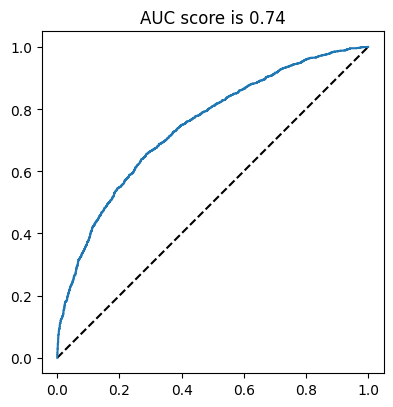

In [ ]:
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# Graficamos la curva ROC y calculamos el AUC para comprobar si nuestro modelo no es mediocre 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

El valor de AUC cercano a 1 puede orientarnos a creer que nuestro modelo es bueno.
Se puede comprobar que de un total de 23921 instancias, se consideró 19136 (80%) para entrenamiento y 4785 (20%) para test.
Esto nos servirá para comprobar posteriormente con nuestra matriz de confusion.